In [122]:
import pandas as pd

data = pd.read_csv('datasets/final_table.csv', index_col='Unnamed: 0')
microsoft = pd.read_csv('datasets/microsoft.csv')
data.head()

,Corn,DOW,Gold,Oil,Twitter
2013-04-02,640.5,14572.849609,1597.75,97.23,0.120448
2013-04-03,641.5,14662.009766,1568.50,95.02,0.163889
2013-04-04,630.0,14550.349609,1545.25,93.26,0.140000
2013-04-05,629.0,14606.110352,1552.75,92.76,0.125506
2013-04-08,633.5,14565.250000,1577.25,93.36,0.044000


In [126]:
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

X_train = data[:500]
X_test = data[500:]
y_train = microsoft['Open'][:500]
y_test = microsoft['Open'][500:]

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)) )
print('R-score: ', r2_score(y_test, y_pred))
print(regr.coef_, regr.intercept_)
y_pred

out = pd.DataFrame({'True' : y_test, 'Predicted' : y_pred})
out.tail(10)

RMSE:  8.22215442594
R-score:  -2.68479906837
[-0.00489112  0.00470516 -0.00391837  0.03769692 -3.31714191] -33.4081963926


,Predicted,True
732,42.075552,52.750000
733,42.199004,53.450001
734,42.332920,54.209999
735,43.055730,54.919998
736,43.926893,53.250000
737,43.879602,53.610001
738,44.022343,54.110001
739,43.532195,53.840000
740,43.694439,53.660000
741,43.922536,54.930000


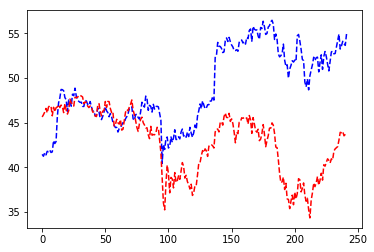

In [120]:
import matplotlib.pyplot as plt

plt.plot(range(242), y_test, 'b--', range(242), y_pred , 'r--')
plt.show()